Genomics Subtype

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd
dataset1 = pd.read_csv('/content/drive/MyDrive/protein_combined_dataset.csv')
df= dataset1.drop(columns=['SAMPLE_ID','TMB_NONSYNONYMOUS','NUM_FULL_TERM_PREGNANCIES','TMB'])
df

,GENOMICS_SUBTYPE,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,...,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,MSI-H,-1.180,-0.8630,-0.8020,0.2220,0.2560,0.6650,1.2800,-0.3390,0.4120,...,-0.08770,0.0000,0.02290,0.1090,0.0000,-0.332,-0.43300,-1.020,-0.12300,-0.0859
1,MSI-H,-0.685,-1.0700,-0.6840,0.9840,0.1350,0.3340,1.3000,0.1390,1.3300,...,-0.03560,0.0000,0.36300,1.0700,0.7370,-0.564,-0.00461,-1.130,-0.07570,-0.4730
2,CNV_low,-0.528,-1.3200,0.4350,0.0000,-0.2400,1.0400,-0.0213,-0.0479,0.4190,...,0.00112,-0.1450,0.01050,-0.1160,0.0000,0.151,-0.07400,-0.540,0.32000,-0.4190
3,CNV_low,-1.670,-1.1900,-0.4430,0.2430,-0.0993,0.7570,0.7400,-0.9290,0.2290,...,0.07250,-0.0552,-0.07140,0.0933,0.1560,-0.398,-0.07520,-0.797,-0.03010,-0.4670
4,CNV_high,-0.374,-0.0206,-0.5370,0.3110,0.3750,0.0131,-1.1000,0.0000,0.5650,...,-0.17600,0.0000,-1.22000,-0.5620,0.9370,-0.646,0.20700,-1.850,-0.17600,0.0513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,MSI-H,-1.070,-0.7120,0.0462,-0.0471,0.2270,1.3500,1.2100,0.0048,0.6820,...,-0.06990,-0.4010,0.55700,0.8270,0.3480,-0.187,-0.10700,-0.830,0.06200,-0.5280
91,CNV_high,-1.280,-0.7360,-0.5520,0.1140,0.2730,1.0700,0.8500,0.0000,-0.5360,...,0.13100,0.0000,-0.00364,0.7630,0.0784,-0.203,0.01320,-1.200,-0.35700,0.0299
92,CNV_high,-0.290,-0.3200,3.1700,-0.9070,0.0317,-0.0425,0.0000,-0.2730,-0.0747,...,-0.17900,-0.5210,0.05230,0.5150,0.5850,0.138,-0.19000,-0.966,-0.00627,-0.2490
93,CNV_high,0.266,1.3900,-0.0655,0.4700,0.3980,-0.1340,0.4610,1.0400,0.3630,...,-0.14000,0.0000,-0.01220,0.2500,0.5530,0.387,0.06420,-0.437,0.10400,-0.4980


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Columns: 11000 entries, GENOMICS_SUBTYPE to ZZZ3
dtypes: float64(10993), int64(6), object(1)
memory usage: 8.0+ MB


In [4]:
# Count the number of occurrences for each molecular subtype
subtype_counts = df['GENOMICS_SUBTYPE'].value_counts()
print(subtype_counts)

GENOMICS_SUBTYPE
CNV_low     43
MSI-H       25
CNV_high    20
POLE         7
Name: count, dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['GENOMICS_SUBTYPE'] = label_encoder.fit_transform(df['GENOMICS_SUBTYPE'])

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('GENOMICS_SUBTYPE', axis=1)
y = df['GENOMICS_SUBTYPE']

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the data (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

# Set random_state consistently to control randomness
lasso = LogisticRegression(
    penalty='l1', solver='saga', C=0.1, max_iter=5000, random_state=50
)
lasso.fit(X_train_scaled, y)

# Use SelectFromModel to manually set a threshold and retain the top 10 features
sfm = SelectFromModel(lasso, threshold=-np.inf, max_features=8, prefit=True)  # Retain the top 10 features
X_train_selected = sfm.transform(X_train_scaled)

# Get the names of the selected features
selected_features = X.columns[sfm.get_support()]
print(f"Selected Features ({selected_features.shape[0]}):", selected_features.tolist())

Selected Features (8): ['MAST4', 'MLH1', 'MTHFD2', 'MX2', 'PMS2', 'RPL22L1', 'SEC16A', 'STAT1']


In [8]:
# Subset the original X to only include selected genes
X_selected = X[selected_features]

In [9]:
!pip install imblearn

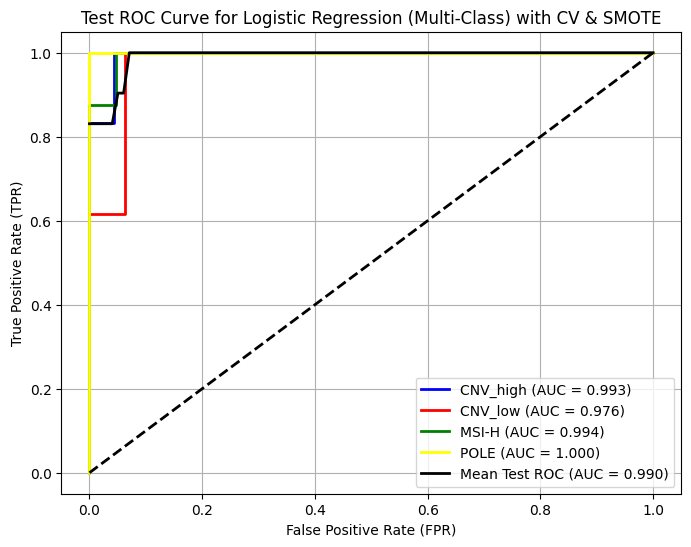

Mean Test AUC: 0.990

Classification Report:
              precision    recall  f1-score   support

    CNV_high      0.833     0.833     0.833         6
     CNV_low      0.909     0.769     0.833        13
       MSI-H      0.875     0.875     0.875         8
        POLE      0.500     1.000     0.667         2

    accuracy                          0.828        29
   macro avg      0.779     0.869     0.802        29
weighted avg      0.856     0.828     0.833        29



In [10]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
from imblearn.over_sampling import SMOTE
from itertools import cycle
import pandas as pd

# Set random seed
random_state = 50

# Define label mapping for class names
label_mapping = {0: "CNV_high", 1: "CNV_low", 2: "MSI-H", 3: "POLE"}
original_labels = [label_mapping[i] for i in range(len(label_mapping))]
# Initialize Logistic Regression with balanced class weights
log_reg_model = LogisticRegression(random_state=random_state, class_weight='balanced', max_iter=500)

# Split dataset into training and final test set (70% train, 30% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify= y, random_state=random_state)

# Number of classes
n_classes = len(np.unique(y))
smote = SMOTE(random_state=random_state,k_neighbors=3 )
# ✅ Apply SMOTE on the entire training set before final model training
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Binarize the target variables for ROC computation
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
# Store AUC scores for training validation
auc_scores = []
mean_fpr = np.linspace(0, 1, 100)  # For mean ROC curve
all_tprs = []  # Store True Positive Rates for each fold

# Train final model on the entire SMOTE-augmented training set
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Predict on final test set
y_test_pred = log_reg_model.predict(X_test)
y_test_prob = log_reg_model.predict_proba(X_test)

# Compute ROC curve for the final test set using binarized test labels
fpr_test = dict()
tpr_test = dict()
auc_test = dict()
all_test_tprs = []

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    auc_test[i] = auc(fpr_test[i], tpr_test[i])
    all_test_tprs.append(np.interp(mean_fpr, fpr_test[i], tpr_test[i]))

# Compute mean test ROC curve
mean_tpr_test = np.mean(all_test_tprs, axis=0)
mean_auc_test = auc(mean_fpr, mean_tpr_test)

# Plot ROC curves for each class (TEST SET)
plt.figure(figsize=(8, 6))
colors = cycle(["blue", "red", "green", "yellow"])

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr_test[i],
        tpr_test[i],
        color=color,
        lw=2,
        label=f"{original_labels[i]} (AUC = {auc_test[i]:.3f})",
    )

# Plot Mean Test ROC Curve
plt.plot(mean_fpr, mean_tpr_test, color='black', linestyle='-', linewidth=2,
         label=f'Mean Test ROC (AUC = {mean_auc_test:.3f})')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Plot formatting
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Test ROC Curve for Logistic Regression (Multi-Class) with CV & SMOTE")
plt.legend(loc="lower right")
plt.grid()
plt.show()
print(f"Mean Test AUC: {mean_auc_test:.3f}")

# Compute and print classification report on test set
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=3, target_names=original_labels))


In [11]:
pip install shap


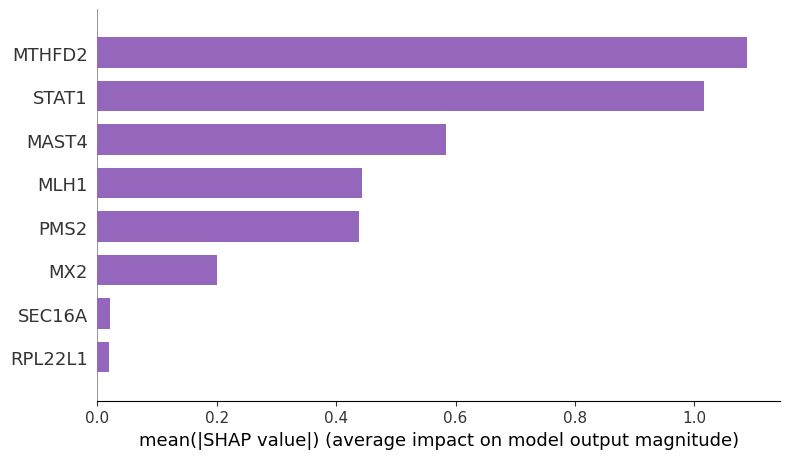

In [12]:
import shap

# Ensure X_test is a DataFrame (if it is an array)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X.columns)  # Restore feature names

# Initialize SHAP Explainer
explainer = shap.Explainer(log_reg_model, X_train)
shap_values = explainer(X_test)

# Convert SHAP values to array format (if needed)
shap_values_array = shap_values.values  # Extract SHAP values correctly

# ✅ Ensure SHAP values are in the right shape
if len(shap_values_array.shape) > 2:
    shap_values_array = shap_values_array[:, :, 1]  # Select the SHAP values for one class (if multi-class)

custom_color = "#9467bd"
shap.summary_plot(shap_values_array, X_test, plot_type="bar", color=custom_color)


In [13]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c0124345eda8adc5ebe9b7de7e748f92c30099348fabc867734563359010f7be
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [167]:
from lime.lime_tabular import LimeTabularExplainer
# Select an instance to explain
idx = 2  # Change this index to explore different test samples
num_explained_labels = 4  # Number of top class labels to explain
# Get class names (list of endometrial cancer subtypes)
class_names = ["CNV_high", "CNV_low", "MSI-H", "POLE"]
# Get feature names (protein markers from your dataset)
feature_names = list(X_train.columns)
# ✅ Initialize LIME Explainer using tabular data
lime_explainer = LimeTabularExplainer(X_train.values,
                                      feature_names=feature_names,
                                      class_names=class_names,
                                      mode='classification')
# ✅ Explain one test instance (Ensure `iloc[idx]` is converted to a NumPy array)
explanation = lime_explainer.explain_instance(X_test.iloc[idx].values,
                                              log_reg_model.predict_proba,
                                              num_features=8,
                                              top_labels=num_explained_labels)
# ✅ Display the explanation (Jupyter Notebook)
explanation.show_in_notebook()
# ✅ Alternative: Print textual explanation if running in a script
print(explanation.as_list())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[('MTHFD2 <= -0.21', 0.3034146418252669), ('MAST4 > 0.21', 0.11920003407076415), ('0.20 < STAT1 <= 0.90', -0.07137486309760153), ('MX2 > 0.44', -0.033361887646277996), ('-0.64 < MLH1 <= 0.14', 0.020426210208485944), ('-0.47 < PMS2 <= 0.00', -0.018069665026643925), ('-0.45 < RPL22L1 <= 0.14', 0.01176749654955289), ('0.19 < SEC16A <= 0.38', 0.005908150964739515)]


TMB

In [ ]:
import pandas as pd
dataset1 = pd.read_csv('/content/drive/MyDrive/protein_combined_dataset.csv')
df1= dataset1.drop(columns=['SAMPLE_ID','TMB_NONSYNONYMOUS','NUM_FULL_TERM_PREGNANCIES','GENOMICS_SUBTYPE'])
df1

,TMB,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,...,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
0,1,-1.180,-0.8630,-0.8020,0.2220,0.2560,0.6650,1.2800,-0.3390,0.4120,...,-0.08770,0.0000,0.02290,0.1090,0.0000,-0.332,-0.43300,-1.020,-0.12300,-0.0859
1,1,-0.685,-1.0700,-0.6840,0.9840,0.1350,0.3340,1.3000,0.1390,1.3300,...,-0.03560,0.0000,0.36300,1.0700,0.7370,-0.564,-0.00461,-1.130,-0.07570,-0.4730
2,0,-0.528,-1.3200,0.4350,0.0000,-0.2400,1.0400,-0.0213,-0.0479,0.4190,...,0.00112,-0.1450,0.01050,-0.1160,0.0000,0.151,-0.07400,-0.540,0.32000,-0.4190
3,0,-1.670,-1.1900,-0.4430,0.2430,-0.0993,0.7570,0.7400,-0.9290,0.2290,...,0.07250,-0.0552,-0.07140,0.0933,0.1560,-0.398,-0.07520,-0.797,-0.03010,-0.4670
4,0,-0.374,-0.0206,-0.5370,0.3110,0.3750,0.0131,-1.1000,0.0000,0.5650,...,-0.17600,0.0000,-1.22000,-0.5620,0.9370,-0.646,0.20700,-1.850,-0.17600,0.0513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,-1.070,-0.7120,0.0462,-0.0471,0.2270,1.3500,1.2100,0.0048,0.6820,...,-0.06990,-0.4010,0.55700,0.8270,0.3480,-0.187,-0.10700,-0.830,0.06200,-0.5280
91,0,-1.280,-0.7360,-0.5520,0.1140,0.2730,1.0700,0.8500,0.0000,-0.5360,...,0.13100,0.0000,-0.00364,0.7630,0.0784,-0.203,0.01320,-1.200,-0.35700,0.0299
92,0,-0.290,-0.3200,3.1700,-0.9070,0.0317,-0.0425,0.0000,-0.2730,-0.0747,...,-0.17900,-0.5210,0.05230,0.5150,0.5850,0.138,-0.19000,-0.966,-0.00627,-0.2490
93,0,0.266,1.3900,-0.0655,0.4700,0.3980,-0.1340,0.4610,1.0400,0.3630,...,-0.14000,0.0000,-0.01220,0.2500,0.5530,0.387,0.06420,-0.437,0.10400,-0.4980


In [ ]:
import pandas as pd

# Assuming dataset1 is already loaded
selected_columns = ['TMB','MAST4', 'MLH1', 'MTHFD2', 'MX2', 'PMS2', 'RPL22L1', 'SEC16A', 'STAT1']
df = df1[selected_columns]
df

,TMB,MAST4,MLH1,MTHFD2,MX2,PMS2,RPL22L1,SEC16A,STAT1
0,1,-0.666000,0.3780,1.1200,-0.0114,-0.1010,1.390,0.1230,0.853
1,1,-0.218000,-1.0900,0.5270,-0.7130,-1.4300,0.944,0.5430,-0.298
2,0,0.195000,-0.0864,0.2550,0.3520,0.4420,-0.107,0.5460,-0.150
3,0,0.653000,0.1880,0.0902,0.7920,0.3820,-1.500,0.2440,-0.153
4,0,-1.580000,0.7510,2.5000,0.6480,0.8550,0.565,-0.0994,3.120
...,...,...,...,...,...,...,...,...,...
90,1,0.000232,-1.5500,0.2760,-0.4540,-1.0100,3.650,0.6710,0.744
91,0,-0.455000,0.1020,0.8970,2.2800,-0.0793,0.771,-0.0347,1.010
92,0,-0.477000,0.5670,0.9120,1.8100,0.6610,1.220,-0.1070,2.140
93,0,-0.795000,0.2120,2.1100,0.4470,0.4710,0.806,-0.0745,2.080


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('TMB', axis=1)
y = df['TMB']

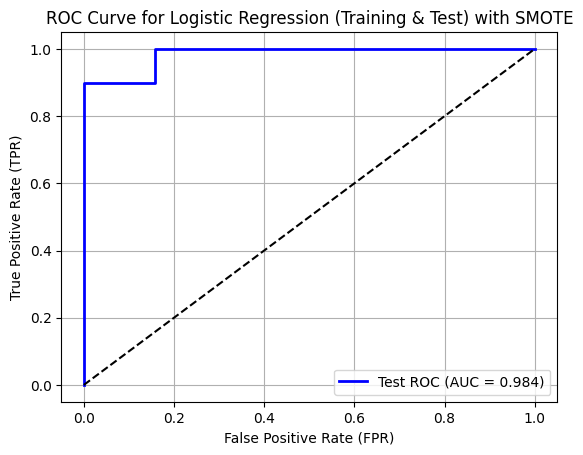

Final Test AUC: 0.984

Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.842     0.914        19
           1      0.769     1.000     0.870        10

    accuracy                          0.897        29
   macro avg      0.885     0.921     0.892        29
weighted avg      0.920     0.897     0.899        29



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


# Set random seed
random_state = 50
# Initialize Logistic Regression with balanced class weights
log_reg_model = LogisticRegression(random_state=random_state, class_weight='balanced', max_iter=500)

# Split dataset into training and final test set (70% train, 30% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify= y, random_state=random_state)

smote = SMOTE(random_state=random_state,k_neighbors=3  )

# ✅ Apply SMOTE on the entire training set before final model training
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train final model on the entire SMOTE-augmented training set
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Predict on final test set
y_test_pred = log_reg_model.predict(X_test)
y_test_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for the final test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, color='blue', linestyle='-', label=f'Test ROC (AUC = {auc_test:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression (Training & Test) with SMOTE")
plt.legend()
plt.grid()
plt.show()
print(f"Final Test AUC: {auc_test:.3f}")

# Compute and print classification report on test set
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred,  digits=3))


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ["TMB<10","TMB>=10"]

# Get the feature names
feature_names = list(X_test.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_test.values, feature_names = feature_names,
                                 class_names = class_names, mode = 'classification')

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

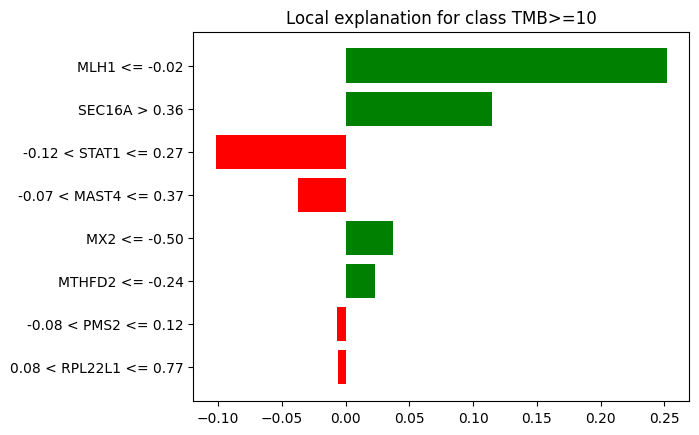

In [ ]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[9], log_reg_model.predict_proba)
fig = explaination.as_pyplot_figure()
# show the result of the model's explaination
explaination.show_in_notebook(show_table = True, show_all = False)

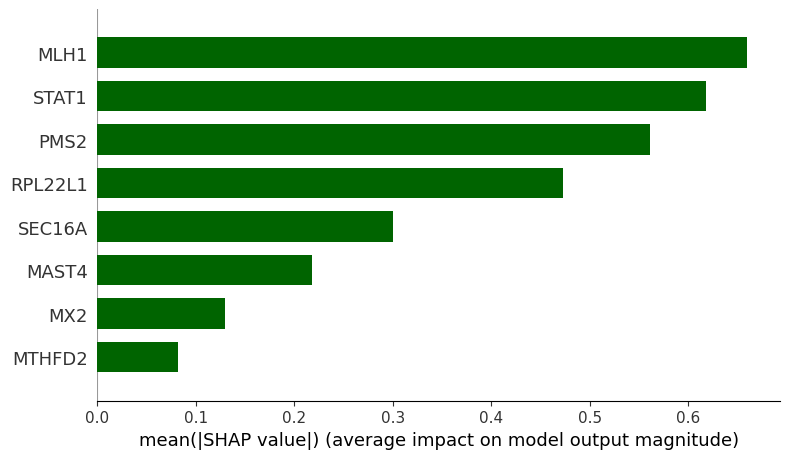

In [ ]:
import shap

# Ensure X_test is a DataFrame (if it is an array)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=X.columns)  # Restore feature names

# Initialize SHAP Explainer
explainer = shap.Explainer(log_reg_model, X_train)
shap_values = explainer(X_test)

# Convert SHAP values to array format (if needed)
shap_values_array = shap_values.values  # Extract SHAP values correctly

# ✅ Ensure SHAP values are in the right shape
if len(shap_values_array.shape) > 2:
    shap_values_array = shap_values_array[:, :, 1]  # Select the SHAP values for one class (if multi-class)
# Custom color (e.g., dark blue)
custom_color = "#006400"

shap.summary_plot(shap_values_array, X_test, plot_type="bar", color=custom_color)
